# CIFAR-10 영상 분류하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


## 모델 구축

In [4]:
model = Sequential()

**Convolution2D**

$32 \times 32 \times 3 \Rightarrow 30 \times 30 \times 64$

Filter
* $(3 \times 3 \times 3) \times 64$

Parameters
* $\#W = 27 \times 64$
* $\#b = 64$

In [5]:
model.add(Conv2D(64, activation='relu', kernel_size=(3, 3), input_shape=(32, 32, 3)))

/opt/anaconda3/envs/ai-lecture-3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-05 16:15:22.582791: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-06-05 16:15:22.582810: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-06-05 16:15:22.582815: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-06-05 16:15:22.582830: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-05 16:15:22.582841: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_

**MaxPooling**

$30 \times 30 \times 64 \Rightarrow 15 \times 15 \times 64$

In [6]:
model.add(MaxPooling2D(pool_size=(2, 2)))

**Convolution 2D**

$15 \times 15 \times 64 \Rightarrow 13 \times 13 \times 32$

Filter
* $(3 \times 3 \times 64) \times 32$

Parameters
* $\#W = 3 \times 3 \times 64 \times 32 = 18\,432$
* $\#b = 32$

In [7]:
model.add(Conv2D(32, activation='relu', kernel_size=(3, 3)))

**Flatten**

$13 \times 13 \times 32 \Rightarrow 5408$

In [8]:
model.add(Flatten())

**Dense (ReLU)**

$5208 \Rightarrow 80$

Parameters
* $\#W=5408 \times 80 = 432\,640$
* $\#b=80$

In [9]:
model.add(Dense(80, activation='relu'))

**Dense (Softmax)**

$80 \Rightarrow 10$

Parameters
* $\#W=80 \times 10 = 800$
* $\#b=10$

In [10]:
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 80)             │       432,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 453,786 (1.73 MB)

 Trainable params: 453,786 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

### 모델 컴파일

In [12]:
# 모델을 컴파일한다.
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 모델을 훈련한다.
history = model.fit(X_train, y_train, epochs=100, verbose=1,validation_split=0.3)

Epoch 1/100


2024-06-05 16:15:23.126615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.1060 - loss: 3.1186 - val_accuracy: 0.1021 - val_loss: 2.3014
Epoch 2/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.1103 - loss: 2.2967 - val_accuracy: 0.1102 - val_loss: 2.3010
Epoch 3/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.1219 - loss: 2.2861 - val_accuracy: 0.1268 - val_loss: 2.2984
Epoch 4/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.1368 - loss: 2.2643 - val_accuracy: 0.2528 - val_loss: 2.0867
Epoch 5/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.2904 - loss: 1.9628 - val_accuracy: 0.3921 - val_loss: 1.6872
Epoch 6/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.4554 - loss: 1.5133 - val_accuracy: 0.4956 - val_loss: 1.4412
Epoch 7/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.5780 - loss: 1.1841 - val_accuracy: 0.5153 - val_loss: 1.4224
Epoch 8/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.6783 - los

### 훈련 평가

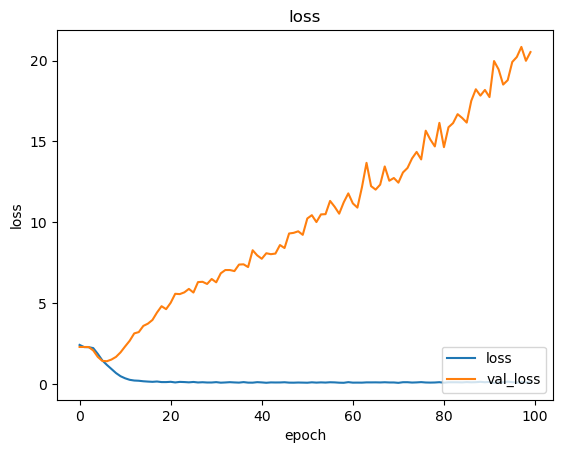

In [13]:
# 손실값을 그래프로 그린다.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc = 'lower right')
plt.show()

## 결과 확인

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
AC: [3], pred: 3
Detail: 
[4.8233107e-36 0.0000000e+00 1.5842562e-35 9.9996972e-01 0.0000000e+00
 3.0278894e-05 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


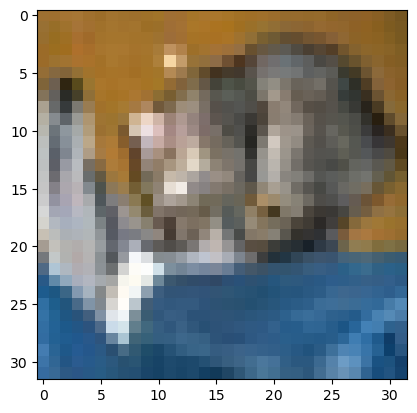

In [14]:
plt.figure()
plt.imshow(X_test[0])
y_pred = model.predict(X_test)
pred = sorted(enumerate(y_pred[0]), key=lambda each: -each[1])[0][0]
print(f'AC: {y_test[0]}, pred: {pred}')
print(f'Detail: \n{y_pred[0]}')